In [2]:

import geopandas
import pandas

# Pour recharger automatiquement le code externe au notebook
%load_ext autoreload
%autoreload 2

pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 5)

from communs.outils import traduire_code_insee_vers_id_commune_crater
from distance_moyenne_aux_commerces.v2_essai_donnes_reelles.main import CHEMIN_DOSSIER_RESULTATS_INDICATEURS_PROXIMITE, \
    CHEMIN_CRATER_DATA_SOURCES
from matplotlib import pyplot as plt

#  Bizarre l'import ne marche pas
from distance_moyenne_aux_commerces.v2_essai_donnes_reelles.points_distribution.indicateurs.calculer_accessibilite_points_distribution import \
    charger_taux_motorisation_menages, charger_grille_densite_communes

CODE_GRANDE_SURFACE_GENERALISTE = 'GRANDE_SURFACE_GENERALISTE'
CODE_PETITE_SURFACE_GENERALISTE = 'PETITE_SURFACE_GENERALISTE'
CODE_BOULANGERIE_PATISSERIE = 'BOULANGERIE_PATISSERIE'
CODE_COMMERCE_SPECIALISE = 'COMMERCE_SPECIALISE'


In [3]:
df = pandas.read_csv(CHEMIN_DOSSIER_RESULTATS_INDICATEURS_PROXIMITE / 'indicateurs_proximite.csv', sep=";")
df_taux_motorisation = charger_taux_motorisation_menages(CHEMIN_CRATER_DATA_SOURCES / 'insee/logements/2018/base-ccc-logement-2018.zip', 'base-cc-logement-2018.CSV')
df_grille_densite = charger_grille_densite_communes(CHEMIN_CRATER_DATA_SOURCES / 'insee/grille_communale_densite/2021/grille_densite_2021_agrege.xlsx')
df = df.merge(df_grille_densite, on='id_commune').merge(df_taux_motorisation, on='id_commune')

In [4]:
gdf_communes = geopandas.read_file(CHEMIN_CRATER_DATA_SOURCES / 'open_street_map/geometries_communes/2021/communes-20210101/communes-20210101.shp')
gdf_communes.set_crs("EPSG:4326")
gdf_communes.to_crs("EPSG:2154", inplace=True)
gdf_communes['id_commune'] = traduire_code_insee_vers_id_commune_crater(gdf_communes['insee'])
gdf_indicateurs = gdf_communes.merge(df, on='id_commune')

In [5]:
df_distance = gdf_indicateurs.pivot(['id_commune', 'population', 'surf_ha', 'categorie_densite', 'indice_densite', 'part_menages_au_moins_une_voiture'], 'code_type_point_distribution', 'distance_moyenne_m').reset_index()
gdf_distance = df_distance.merge(gdf_communes.loc[:, ['id_commune', 'geometry']], on='id_commune', how='left')

df_distance_indicateurs = df_distance.loc[:, ['id_commune', 'indice_densite', 'part_menages_au_moins_une_voiture', 'BOULANGERIE_PATISSERIE', 'GRANDE_SURFACE_GENERALISTE', 'PETITE_SURFACE_GENERALISTE', 'COMMERCE_SPECIALISE']]

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

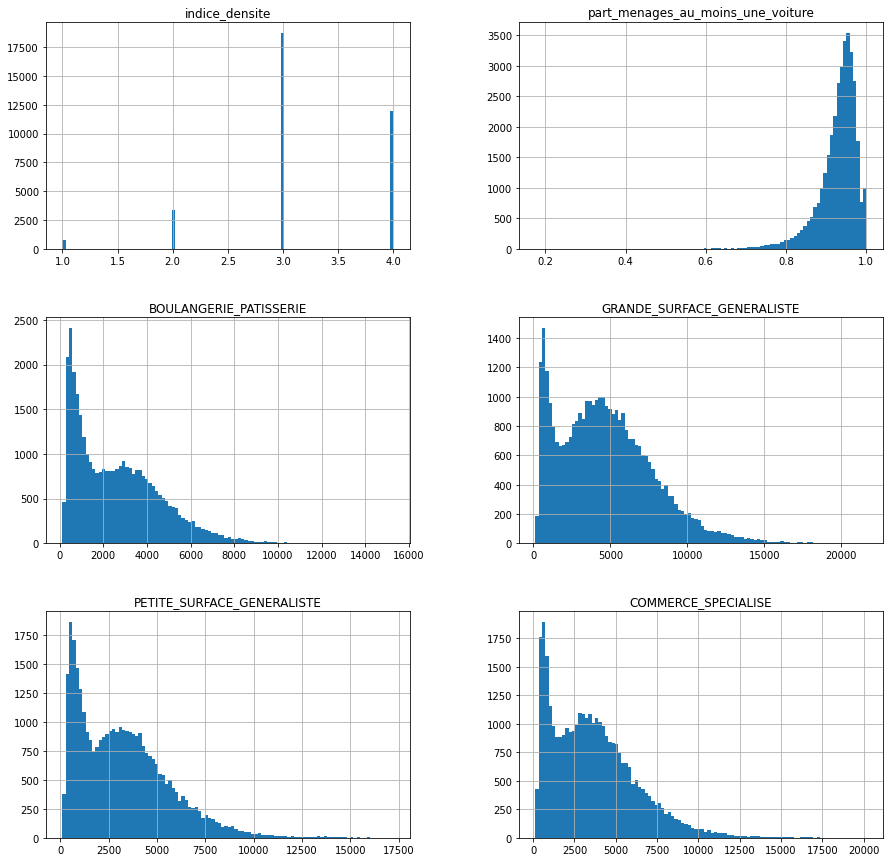

In [7]:
df_distance_indicateurs.hist(figsize=(15, 15), bins=100)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

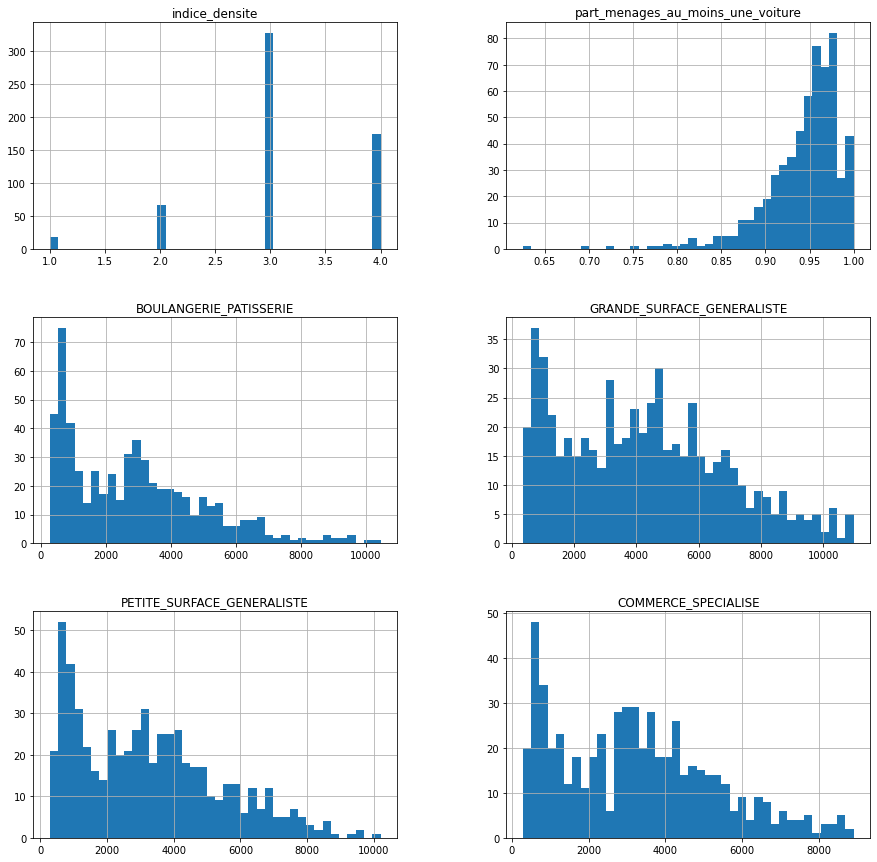

In [12]:
df_distance_indicateurs.loc[df_distance.id_commune.str.startswith('C-31'), :].hist(figsize=(15, 15), bins=40)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

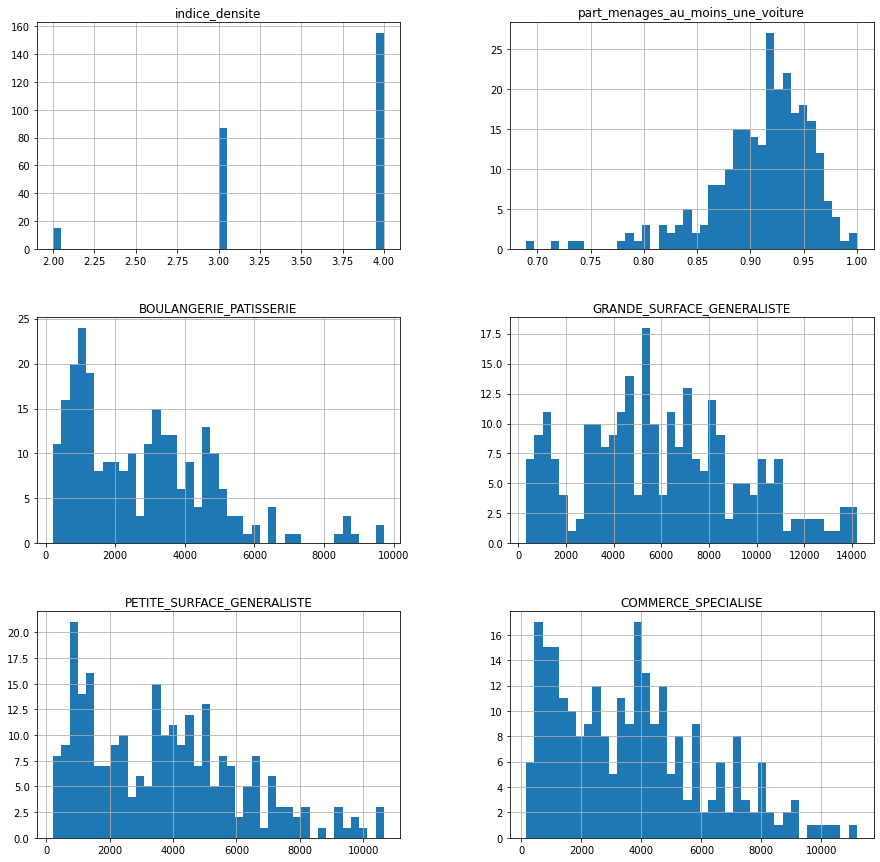

In [13]:
df_distance_indicateurs.loc[df_distance.id_commune.str.startswith('C-43'), :].hist(figsize=(15, 15), bins=40)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

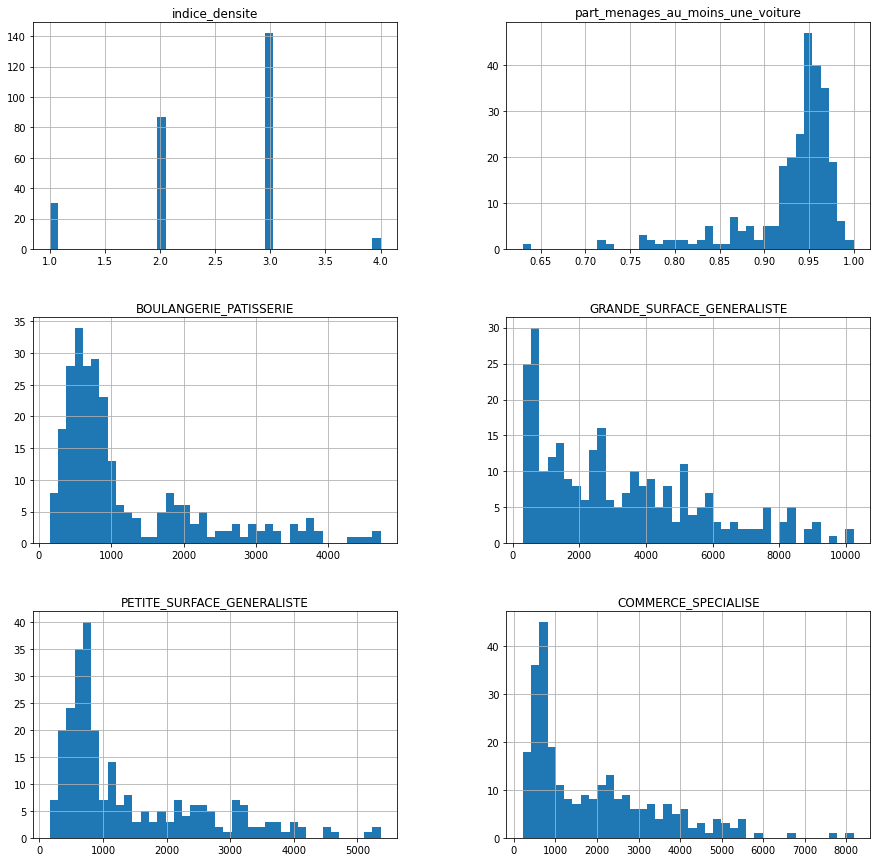

In [15]:
df_distance_indicateurs.loc[df_distance.id_commune.str.startswith('C-69'), :].hist(figsize=(15, 15), bins=40)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

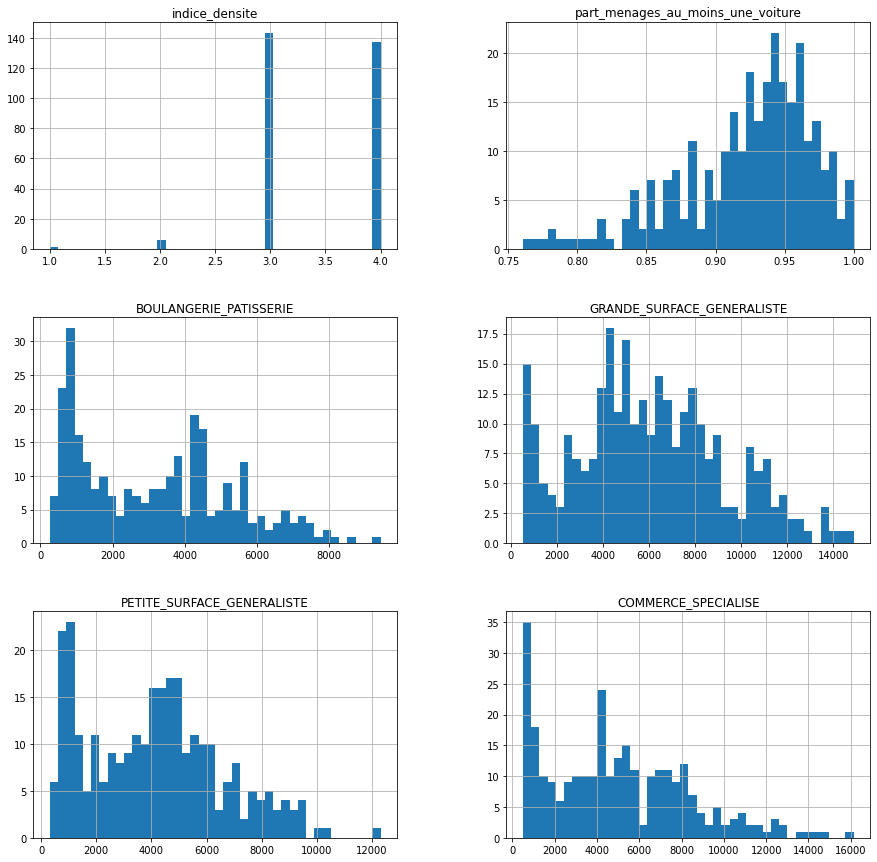

In [17]:
df_distance_indicateurs.loc[df_distance.id_commune.str.startswith('C-18'), :].hist(figsize=(15, 15),bins=40)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

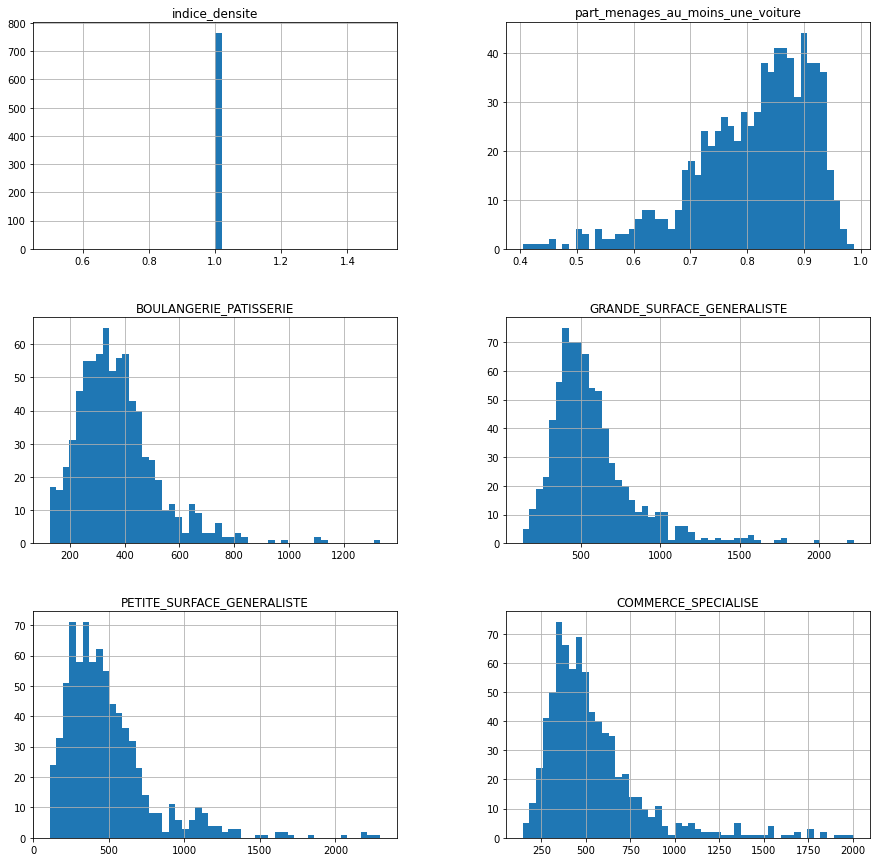

In [18]:
# 'DENSEMENT_PEUPLEE',
#2: 'DENSITE_INTERMEDIAIRE',
#3: 'PEU_DENSE',
#4: 'TRES_PEU_DENSE'
df_distance_indicateurs.loc[df_distance.categorie_densite == 'DENSEMENT_PEUPLEE', :].hist(figsize=(15, 15),bins=50)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

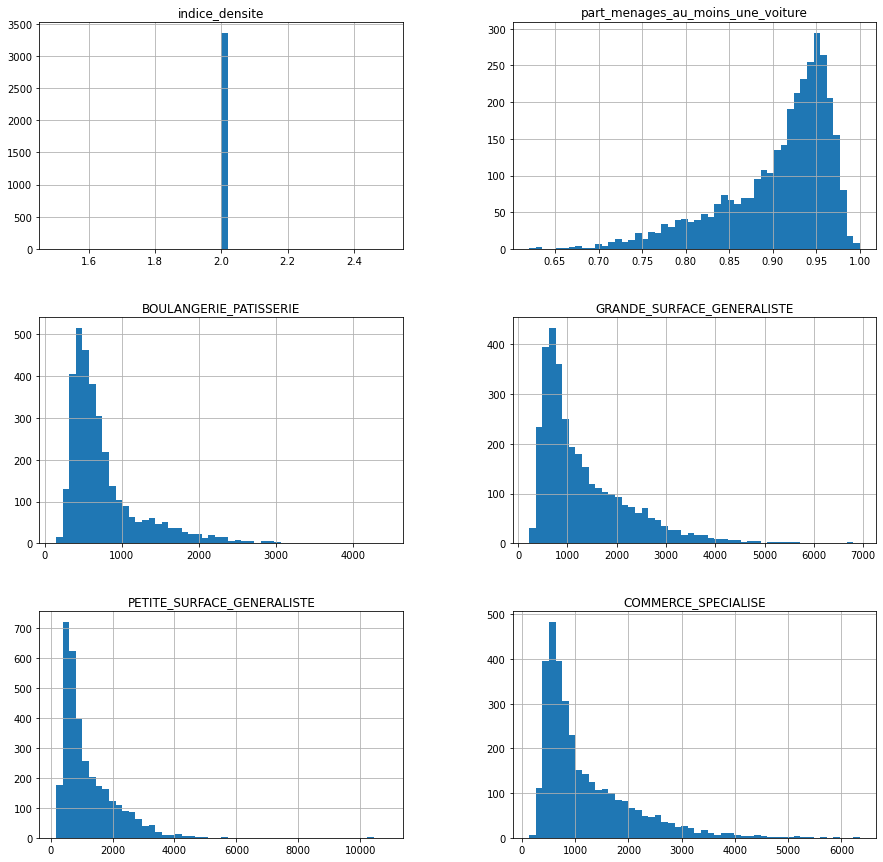

In [19]:
df_distance_indicateurs.loc[df_distance.categorie_densite == 'DENSITE_INTERMEDIAIRE', :].hist(figsize=(15, 15),bins=50)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

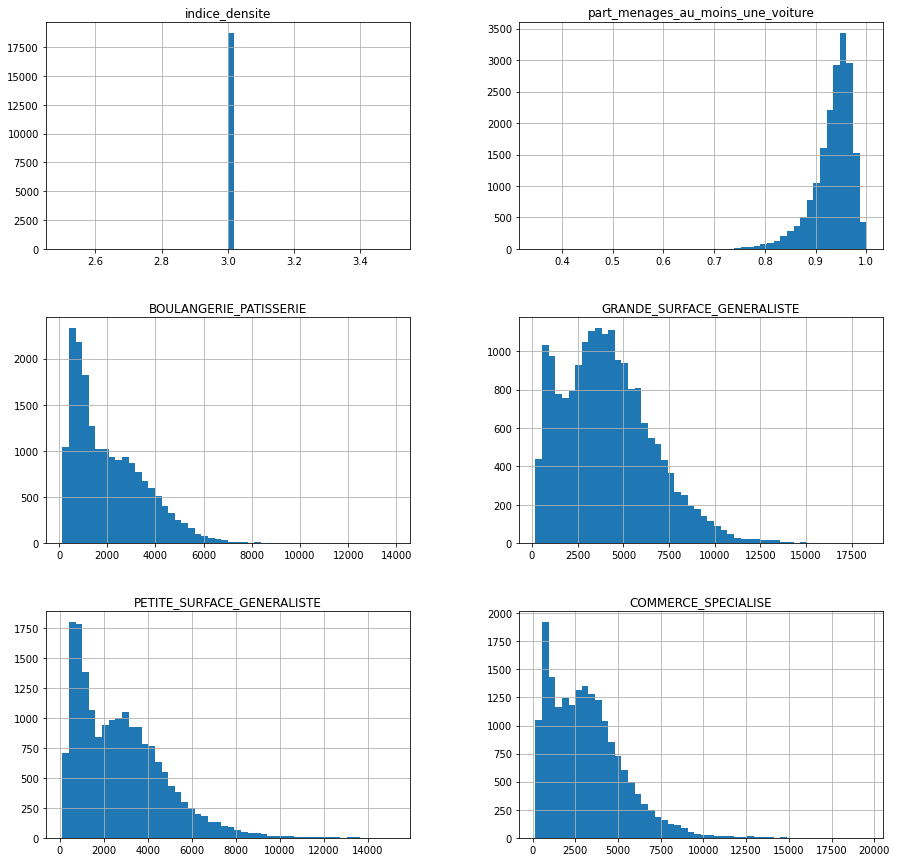

In [20]:
df_distance_indicateurs.loc[df_distance.categorie_densite == 'PEU_DENSE', :].hist(figsize=(15, 15),bins=50)

array([[<AxesSubplot:title={'center':'indice_densite'}>,
        <AxesSubplot:title={'center':'part_menages_au_moins_une_voiture'}>],
       [<AxesSubplot:title={'center':'BOULANGERIE_PATISSERIE'}>,
        <AxesSubplot:title={'center':'GRANDE_SURFACE_GENERALISTE'}>],
       [<AxesSubplot:title={'center':'PETITE_SURFACE_GENERALISTE'}>,
        <AxesSubplot:title={'center':'COMMERCE_SPECIALISE'}>]],
      dtype=object)

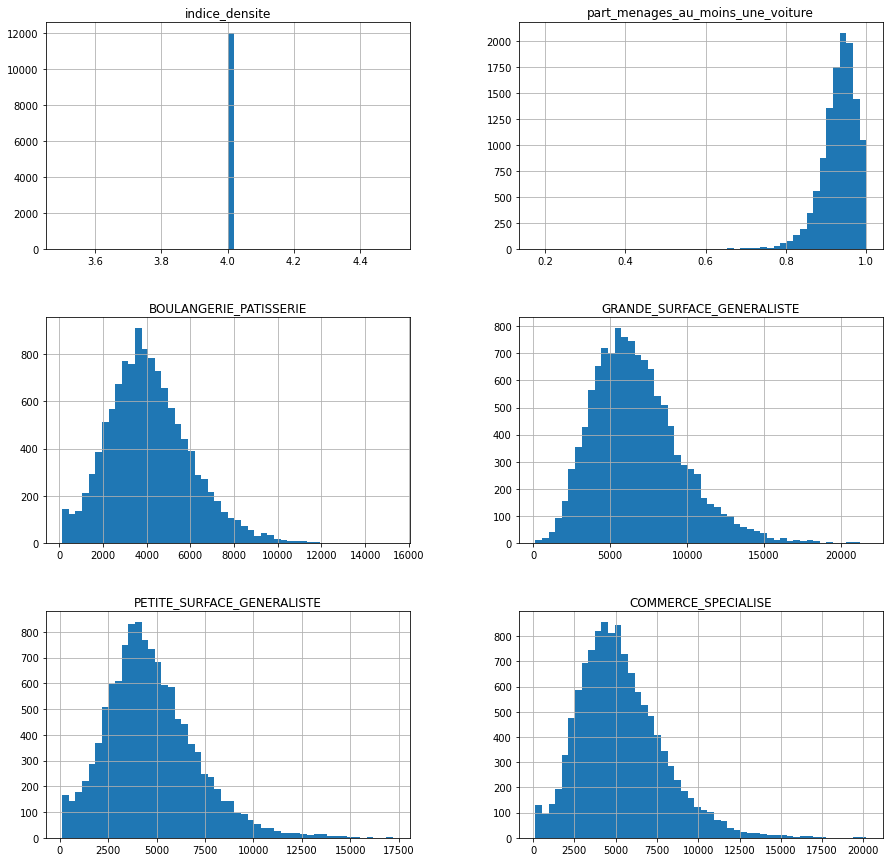

In [21]:

df_distance_indicateurs.loc[df_distance.categorie_densite == 'TRES_PEU_DENSE', :].hist(figsize=(15, 15),bins=50)

In [24]:
df_distance.loc[:, ['id_commune', 'population', 'categorie_densite']].groupby('categorie_densite').sum()

code_type_commerce  population
categorie_densite             
DENSEMENT_PEUPLEE   20283445.0
...                        ...
TRES_PEU_DENSE       2338026.0

[4 rows x 1 columns]

In [13]:
df_distance.loc[:, ['id_commune', 'population', 'categorie_densite', 'BOULANGERIE_PATISSERIE', 'GRANDE_SURFACE_GENERALISTE']].groupby('categorie_densite'
                                                                              ).agg(
                                        Nombre_de_communes=("id_commune", "count"),
                                        Population=("population", "sum"),
                                        Distance_moyenne_1ere_boulangerie=('BOULANGERIE_PATISSERIE','mean'),
                                        Distance_moyenne_1ere_GSA=('GRANDE_SURFACE_GENERALISTE','mean'))

Nombre_de_communes  Population  \
categorie_densite                                       
DENSEMENT_PEUPLEE                     764  20283445.0   
DENSITE_INTERMEDIAIRE                3353  17902243.5   
PEU_DENSE                           18707  18987322.5   
TRES_PEU_DENSE                      11997   2338026.0   

                       Distance_moyenne_1ere_boulangerie  \
categorie_densite                                          
DENSEMENT_PEUPLEE                             372.086258   
DENSITE_INTERMEDIAIRE                         773.907633   
PEU_DENSE                                    2088.271316   
TRES_PEU_DENSE                               4147.100446   

                       Distance_moyenne_1ere_GSA  
categorie_densite                                 
DENSEMENT_PEUPLEE                     569.302346  
DENSITE_INTERMEDIAIRE                1336.799121  
PEU_DENSE                            4182.255520  
TRES_PEU_DENSE                       6779.258055

In [20]:
df_distance_synthese_boulangerie = df_distance.loc[df_distance.BOULANGERIE_PATISSERIE > 3000, ['id_commune', 'population', 'categorie_densite', 'BOULANGERIE_PATISSERIE']].groupby('categorie_densite'
                                                                              ).agg(
                                        Nombre_de_communes=("id_commune", "count"),
                                        Population=("population", "sum"),
                                        Distance_moyenne_1ere_boulangerie=('BOULANGERIE_PATISSERIE','mean'))
display(df_distance_synthese_boulangerie)
df_distance_synthese_boulangerie.sum()

Nombre_de_communes  Population  \
categorie_densite                                       
DENSITE_INTERMEDIAIRE                   9      7903.0   
PEU_DENSE                            4838   2338217.5   
TRES_PEU_DENSE                       8614   1543887.0   

                       Distance_moyenne_1ere_boulangerie  
categorie_densite                                         
DENSITE_INTERMEDIAIRE                        3625.540064  
PEU_DENSE                                    4181.129827  
TRES_PEU_DENSE                               4975.213589

Nombre_de_communes                   1.346100e+04
Population                           3.890008e+06
Distance_moyenne_1ere_boulangerie    1.278188e+04
dtype: float64

In [21]:
df_distance_synthese_gsa = df_distance.loc[df_distance.GRANDE_SURFACE_GENERALISTE > 3000, ['id_commune', 'population', 'categorie_densite', 'GRANDE_SURFACE_GENERALISTE']].groupby('categorie_densite'
                                                                              ).agg(
                                        Nombre_de_communes=("id_commune", "count"),
                                        Population=("population", "sum"),
                                        Distance_moyenne_1ere_GSA=('GRANDE_SURFACE_GENERALISTE','mean'))
display(df_distance_synthese_gsa)
df_distance_synthese_gsa.sum()

Nombre_de_communes  Population  \
categorie_densite                                       
DENSITE_INTERMEDIAIRE                 197    335601.5   
PEU_DENSE                           12215   8878922.0   
TRES_PEU_DENSE                      11186   2169329.0   

                       Distance_moyenne_1ere_GSA  
categorie_densite                                 
DENSITE_INTERMEDIAIRE                3819.959372  
PEU_DENSE                            5513.733028  
TRES_PEU_DENSE                       7104.819749

Nombre_de_communes           2.359800e+04
Population                   1.138385e+07
Distance_moyenne_1ere_GSA    1.643851e+04
dtype: float64

array([[<AxesSubplot:xlabel='part_menages_au_moins_une_voiture', ylabel='part_menages_au_moins_une_voiture'>,
        <AxesSubplot:xlabel='BOULANGERIE_PATISSERIE', ylabel='part_menages_au_moins_une_voiture'>],
       [<AxesSubplot:xlabel='part_menages_au_moins_une_voiture', ylabel='BOULANGERIE_PATISSERIE'>,
        <AxesSubplot:xlabel='BOULANGERIE_PATISSERIE', ylabel='BOULANGERIE_PATISSERIE'>]],
      dtype=object)

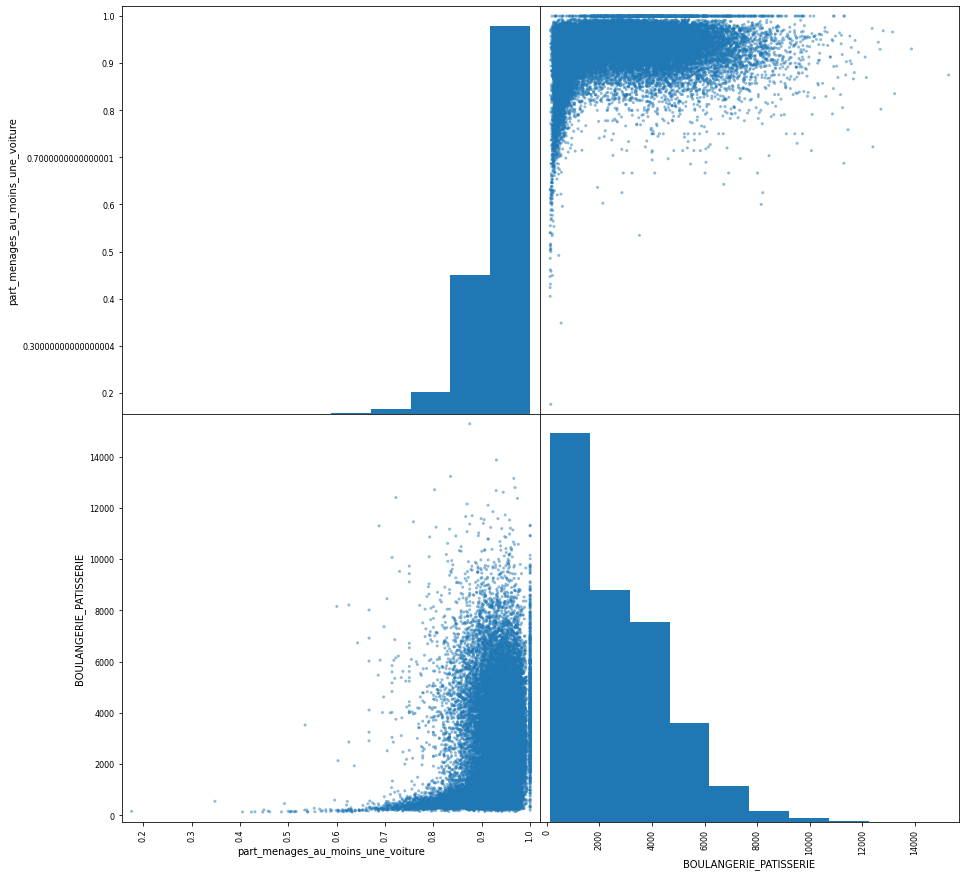

In [23]:
# Vérifier que la densité de pop n'est pas tout simplement corrélée à la distance aux commerces
# Le résultat montre que non pour les densités <  ~1000hab/km2 il n'y a pas de corrélation; Au dessus, la distance tend très rapidement vers 0
from pandas.plotting import scatter_matrix

df_distance['densite'] = df_distance.population / (df_distance.surf_ha / 100)
# scatter_matrix(df_distance[['BOULANGERIE_PATISSERIE', 'GRANDE_SURFACE_GENERALISTE', 'PETITE_SURFACE_GENERALISTE', 'COMMERCE_SPECIALISE', 'indice_densite', 'part_menages_au_moins_une_voiture']], figsize=(15,15))
scatter_matrix(df_distance[['part_menages_au_moins_une_voiture', 'BOULANGERIE_PATISSERIE']], figsize=(15,15))

<AxesSubplot:>

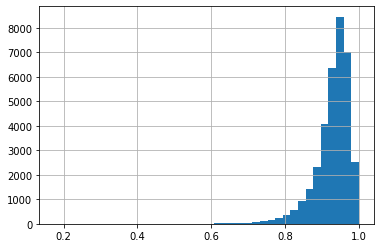

In [29]:
df_distance['part_menages_au_moins_une_voiture'].hist(bins=40)

In [89]:
gdf_bou['distance_population'] = gdf_bou.population * gdf_bou.distance_moyenne_m
print('Distance moyenne à une boulangerie en France : ')
print(gdf_bou.distance_population.sum() / gdf_bou.population.sum())

gdf_gsg['distance_population'] = gdf_gsg.population * gdf_gsg.distance_moyenne_m
print('Distance moyenne à une grande surface en France : ')
print(gdf_gsg.distance_population.sum() / gdf_gsg.population.sum())

Distance moyenne à une boulangerie en France : 
912.0498395276271
Distance moyenne à une grande surface en France : 
1724.6783686731965


/home/lionel/.local/share/virtualenvs/crater-data-exploration-ac7oYM1D/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
